# FEATURE ENGINEERING

Este punto debe cubrir un ejercicio de feature engineering; creación de nuevas variables a partir de las variables seleccionadas como válidas en la práctica 2. 


Las variables añadidas, deben ser evaluadas con el mismo proceso que el resto de variables, es decir, IV, PSI, y correlación. Si pasa estos filtros, se debe evaluar si la feature diseñada mejora el rendimiento del modelo o no.



- Tasas de variables en diferentes momentos temporales, por ejemplo: PublicRecordsLast10Yeards / 12 Months
- Transformaciones matemáticas a las features: Log, exp, transformaciones no monótonas, …
- Transformaciones con sentido de ‘negocio’ 
- Propuesta de interaction terms


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## LECTURA DE DATOS

In [10]:
df = pd.read_csv('prosperLoanData_train.csv')
df_oot = pd.read_csv('prosperLoanData_oot.csv')

C:\Users\jcasa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
drop = ["LoanStatus","ClosedDate","BorrowerAPR","ListingKey","ListingNumber","ListingCreationDate","Term",
             "CreditGrade","BorrowerRate","LenderYield","EstimatedEffectiveYield","EstimatedLoss",
             "EstimatedReturn","BorrowerState","CurrentlyInGroup",
             "GroupKey","DateCreditPulled","PublicRecordsLast10Years",
             "PublicRecordsLast12Months","RevolvingCreditBalance","BankcardUtilization","AvailableBankcardCredit",
             "TradesOpenedLast6Months","DebtToIncomeRatio","IncomeVerifiable","LoanKey",'TotalProsperLoans',
             'TotalProsperPaymentsBilled','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate',
             'ProsperPrincipalBorrowed','ProsperPrincipalOutstanding','LoanCurrentDaysDelinquent','LoanFirstDefaultedCycleNumber','LoanMonthsSinceOrigination',
             'LoanNumber',"LP_CustomerPrincipalPayments",'LoanOriginationDate','LoanOriginationQuarter',
             'LP_CustomerPrincipalPayments','LP_CustomerPayments','MonthlyLoanPayment','MemberKey',
             "LP_InterestandFees","LP_ServiceFees","LP_CollectionFees","LP_GrossPrincipalLoss",
             "LP_NetPrincipalLoss","LP_NonPrincipalRecoverypayments","Recommendations", "InvestmentFromFriendsCount","Investors",
             "InvestmentFromFriendsAmount", "bad_aux", "PW", "bad_rate", "bad", 'fraud', 'indeterm', 'LoanOriginationYear', 'LoanMonthsSinceOriginationY',
            'ProsperRating (numeric)', 
            'ProsperRating (Alpha)', 'ProsperScore', 'FirstRecordedCreditLine']

In [12]:
features = [c for c in df.columns if c not in drop]
col_target = 'bad'

In [13]:
len(features)

24

Para **ListingCategory (numeric)**, tenemos lo siguiente:
- 0 - Not Available
- 1 - Debt Consolidation
- 2 - Home Improvement
- 3 - Business
- 4 - Personal Loan
- 5 - Student Use
- 6 - Auto
- 7- Other
- 8 - Baby&Adoption
- 9 - Boat
- 10 - Cosmetic Procedure
- 11 - Engagement Ring
- 12 - Green Loans
- 13 - Household Expenses
- 14 - Large Purchases
- 15 - Medical/Dental
- 16 - Motorcycle
- 17 - RV
- 18 - Taxes
- 19 - Vacation
- 20 - Wedding Loans


In [14]:
df[features[3]].unique()

array([ 34.,   1.,  22.,  52., 122.,   7., 131., 378.,  68., 132.,  38.,
        82.,  50.,  71., 180.,  78., 306., 329., 254.,  24.,  14., 234.,
        44., 143.,   9.,  54., 183., 128.,  12.,  97., 209.,  55., 231.,
        43.,  95.,  25., 225.,  30.,  35.,  36.,  29., 123., 315., 392.,
        23.,  73.,  51.,  47.,  26.,   0., 153.,   8., 257., 101., 179.,
        67.,  61.,  70.,  53., 446.,  87., 111.,  41.,  65., 133.,  31.,
         5.,  28., 124.,  39., 121.,   4., 223.,  89.,  93.,   6.,  60.,
       103.,  58.,   3., 110.,  11.,  16., 140.,   2.,  33.,  46., 102.,
       251., 324., 114., 135., 160., 268.,  56.,  84.,  72., 248., 137.,
       235., 290.,  15., 238., 129.,  77.,  94.,  37., 340., 156., 289.,
        69., 167., 115.,  49.,  74.,  10., 280.,  91., 144.,  80.,  62.,
       100.,  79., 359., 171., 164.,  64., 283., 303., 163., 309.,  17.,
        57.,  40., 189.,  92.,  32., 202.,  59., 188.,  21., 380., 495.,
       341.,  85., 117., 148., 125.,  86., 382., 18

In [15]:
df[features[3]].max()

755.0

## CREACIÓN DE VARIABLES

In [16]:
def emp_stat_dur(x):
    if (x >=0. and x <= 120):
        return 0
    elif ( x >120 and x <= 240):
        return 1
    elif ( x >240 and x <=360):
        return 2
    elif (x> 360 and x <= 420):
        return 3
    elif(x>420 and x <= 520):
        return 4
    else:
        return 5

In [17]:
new_stat_dur= df[features[3]].apply(emp_stat_dur)
new_stat_dur.head()

0    0
1    0
2    0
3    0
4    1
Name: EmploymentStatusDuration, dtype: int64

In [18]:
features[6:15]

['CreditScoreRangeUpper',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'OpenRevolvingAccounts',
 'OpenRevolvingMonthlyPayment',
 'InquiriesLast6Months',
 'TotalInquiries',
 'CurrentDelinquencies']

## importante

In [19]:
df['CurrentCreditLines'].max()

40.0

In [20]:
def current_lines(x):
    if (x >=0. and x <= 10):
        return 0
    elif ( x >10 and x <= 20):
        return 1
    elif ( x >20 and x <=30):
        return 2
    elif (x> 30 and x <= 40):
        return 3

In [21]:
new_current_lines= df['CurrentCreditLines'].apply(current_lines)
new_current_lines.unique()

array([0, 1, 2, 3], dtype=int64)

In [22]:
df['OpenCreditLines'].max()

34.0

In [23]:
def open_lines(x):
    if (x >=0. and x <= 10):
        return 0
    elif ( x >10 and x <= 20):
        return 1
    elif ( x >20 and x <=30):
        return 2
    elif (x> 30 and x <= 40):
        return 3

In [24]:
new_open_lines= df['OpenCreditLines'].apply(open_lines)
new_open_lines.unique()

array([0, 1, 2, 3], dtype=int64)

In [25]:
def total_credit_7years(x):
    if (x >=0. and x <= 20):
        return 0
    elif ( x >20 and x <= 40):
        return 1
    elif ( x >40 and x <=60):
        return 2
    elif (x> 60 and x <= 80):
        return 3
    elif (x > 80 and x<= 100):
        return 4
    else:
        return 5

In [26]:
new_credit_7years= df['TotalCreditLinespast7years'].apply(total_credit_7years)
new_credit_7years.unique()

array([1, 0, 2, 3, 4, 5], dtype=int64)

In [27]:
df['OpenRevolvingAccounts'].max()

33

In [28]:
def revolving_acounts(x):
    if (x >=0. and x <= 10):
        return 0
    elif ( x >10 and x <= 20):
        return 1
    elif ( x >20 and x <=30):
        return 2
    elif (x> 30 and x <= 40):
        return 3

In [29]:
new_revolving_accounts= df['OpenRevolvingAccounts'].apply(revolving_acounts)
new_revolving_accounts.unique()

array([0, 1, 2, 3], dtype=int64)

In [30]:
df['OpenRevolvingMonthlyPayment'].max()

5184.0

In [31]:
def revolving_accounts_monthly(x):
    if (x >=0. and x <= 1000):
        return 0
    elif ( x >1000 and x <= 2000):
        return 1
    elif ( x >2000 and x <=3000):
        return 2
    elif (x> 3000 and x <= 4000):
        return 3
    elif (x> 4000 and x< 5000):
        return 4
    else:
        return 5

In [32]:
new_revolving_accounts_monthly= df['OpenRevolvingMonthlyPayment'].apply(revolving_accounts_monthly)
new_revolving_accounts_monthly.unique()

array([0, 1, 2, 3, 5, 4], dtype=int64)

In [33]:
df['InquiriesLast6Months'].max()

27.0

In [34]:
def inquiring_6months(x):
    if (x >=0. and x <= 10):
        return 0
    elif ( x >10 and x <= 20):
        return 1
    else:
        return 2

In [35]:
new_inquiring= df['InquiriesLast6Months'].apply(inquiring_6months)
new_inquiring.unique()

array([0, 2, 1], dtype=int64)

In [36]:
df[]

SyntaxError: invalid syntax (<ipython-input-36-71f11347ebfc>, line 1)

In [37]:
cat_features = [f for f, b in zip(features, df[features].dtypes == object) if b==True]
num_features = [f for f in features if f not in cat_features]

In [38]:
from scipy.stats import boxcox

In [43]:
boxcox_transformed_data = boxcox(num_features)

TypeError: '<=' not supported between instances of 'numpy.ndarray' and 'int'

In [51]:
from scipy import stats
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Probplot against normal distribution')

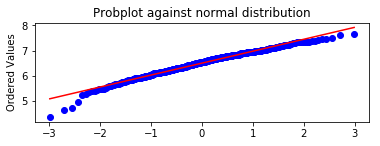

In [54]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
x = stats.loggamma.rvs(5, size=500) + 5
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

In [53]:
ax2 = fig.add_subplot(212)
xt = stats.boxcox(num_features)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

TypeError: '<=' not supported between instances of 'numpy.ndarray' and 'int'

## ELIMINACIÓN ANTIGUAS VARIABLES E INCLUSIÓN DE LAS NUEVAS

## ANÁLISIS DE LAS CORRELACIONES

In [119]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

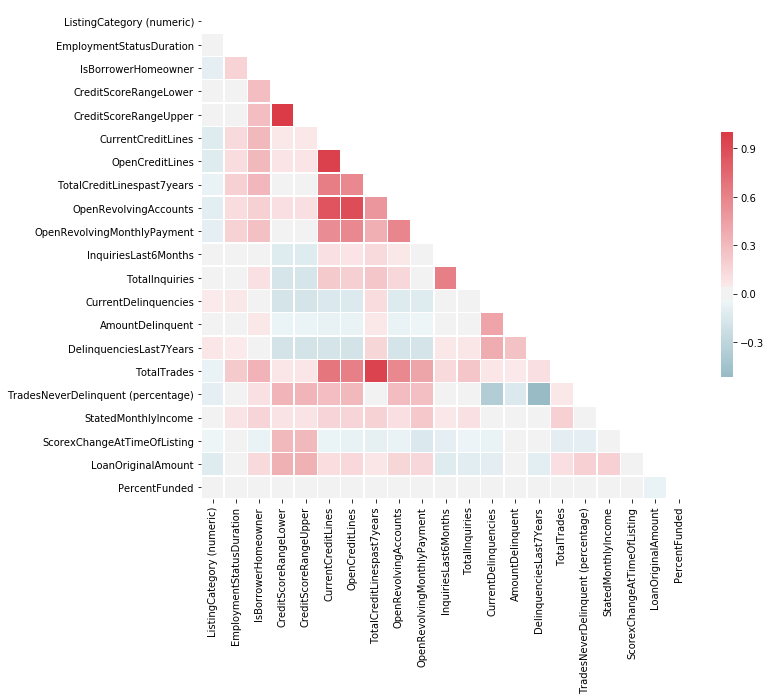

In [122]:
corr = df[num_features].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})